In [ ]:
# Fristly, we should take a look at our TRAINING set.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [2]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# id - id of one training set question pair
#qid1,qid2 - unique ids of each question(only available in train.csv)
#question1,question2 - the full text for each question
#is_duplicate - the label that we are trying to predict(1= it is duplicate; 0= it is not)

In [ ]:
# TESTING data set

In [3]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


In [4]:
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
# We can see that the test data has more samples than our train data.
# This is due the fact that kaggle added some extra computer-generated question pairs.

In [8]:
duplicate_pairs = df_train['is_duplicate'].mean() * 100

# Concatenating questions id in one Series

questions_id = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
unique_questions = np.unique(questions_id).shape[0]
multiple_occuring_questions = np.sum(questions_id.value_counts() > 1)
#print(questions_id.value_counts())

print('Duplicate pairs in train set: {}%'.format(duplicate_pairs))
print('Number of unique questions in train set: {}'.format(unique_questions))
print('Number of questions that occur multiple times in train set: {}'.format(multiple_occuring_questions))

Duplicate pairs in train set: 36.9197853026293%
Number of unique questions in train set: 537933
Number of questions that occur multiple times in train set: 111780


In [ ]:
# From the above results, we can conclude that the train set is a bit unbalanced.
# Also, aproximately 34% of questions are occuring more than one time.

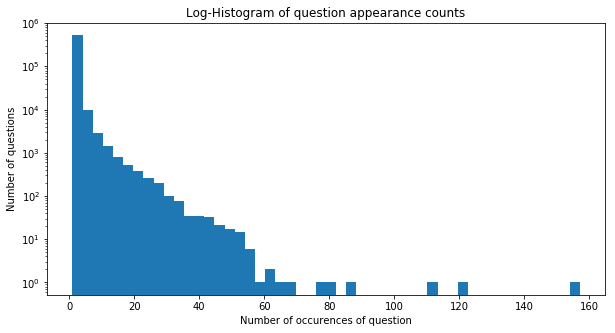

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(questions_id.value_counts(), bins=50)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

plt.show()

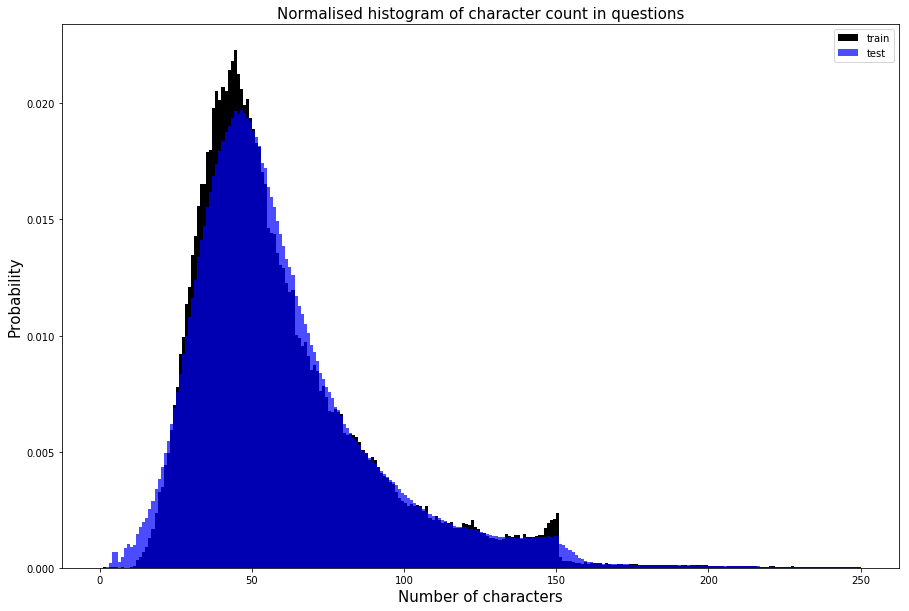

In [12]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)


char_train = train_qs.apply(len)
char_test = test_qs.apply(len)


plt.figure(figsize=(15, 10))
plt.hist(char_train, bins=250, range=[0, 250], color='black',density=True, label='train')
plt.hist(char_test, bins=250, range=[0, 250], color='blue',density=True, alpha=0.7, label='test')

plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

plt.show()

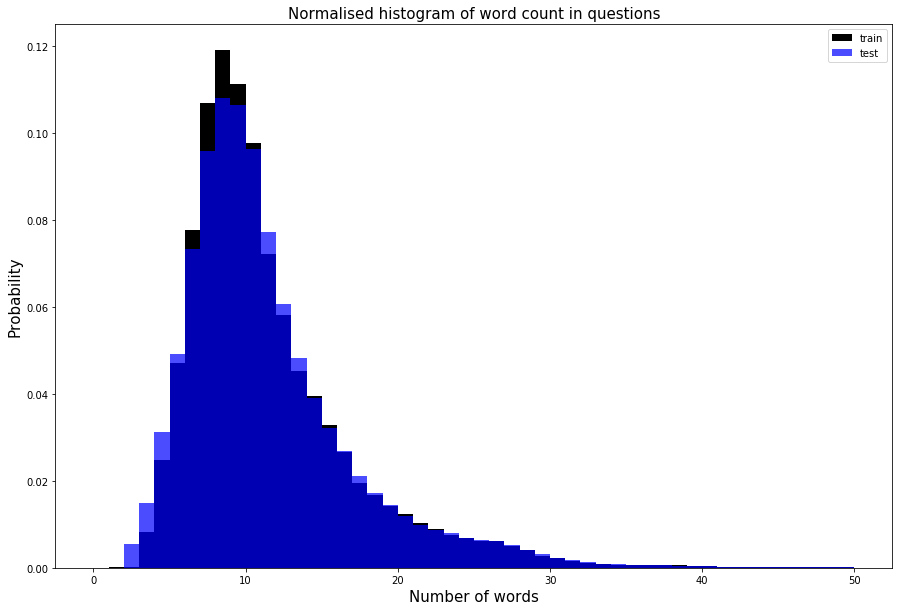

In [14]:
# We`ll do the same thing for words
from nltk import word_tokenize
from time import time


word_train = train_qs.apply(lambda x: len(x.split(' ')))
word_test = test_qs.apply(lambda x: len(x.split(' ')))

# word_train = train_qs.apply(lambda question: len(word_tokenize(question)))
# word_test = test_qs.apply(lambda question: len(word_tokenize(question)))

plt.figure(figsize=(15, 10))
plt.hist(word_train, bins=50, range=[0, 50], color= 'black', density=True, label='train')
plt.hist(word_test, bins=50, range=[0, 50], color='blue', density=True, alpha=0.7, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()



In [ ]:
#Again, we can see similar distribution for both test and train datasets with most questions having about 10 words

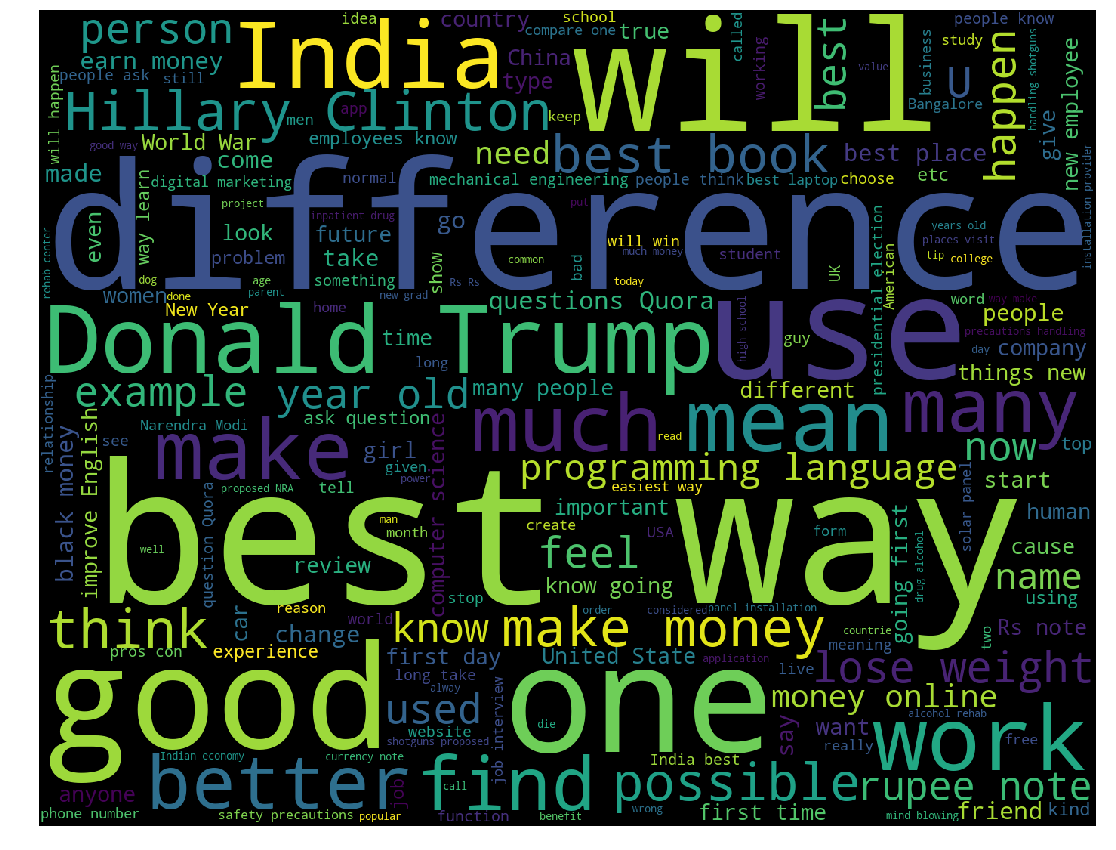

In [15]:
from wordcloud import WordCloud

cloud = WordCloud(width = 1400, height= 1080).generate(" ".join(train_qs.astype(str)))

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud = WordCloud(width = 1400, height= 1080).generate(" ".join(test_qs.astype(str)))

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# As we can see, in both sets, the most used words are the same.
# Given this fact, we can conclude that, also, the topics of questions are the same.

In [16]:
#Geting the number of similar words in a pair.

lst_q1 = df_train['question1'].tolist()
lst_q2 = df_train['question2'].tolist()
labels = df_train['is_duplicate'].tolist()
print(len(labels))
print(lst_q1[2])
print((lst_q2[2]))
print(labels[2])

404290
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
0


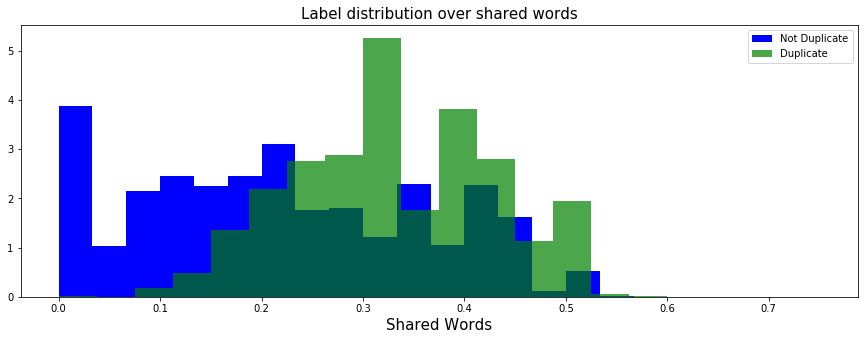

In [17]:
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
labels_shared_words ={
    '0': [],
    '1': []
}

def shared_words(sample1, sample2):
    count = 0
    #Tokenizing the initial questions, ignoring the stop words
    
    question1_tokenized =[
        word.lower() 
        for word in word_tokenize(str(sample1)) 
        if word not in stop_words
    ]
    question2_tokenized =[
        word.lower() 
        for word in word_tokenize(str(sample2)) 
        if word not in stop_words
    ]
    
    #Gettin rid of punctuation 
    
    np_q1 = [
        word 
        for word in question1_tokenized 
        if word.isalnum()
    ]
    np_q2 = [
        word 
        for word in question2_tokenized 
        if word.isalnum()
    ]
    
    if len(np_q1) == 0 or len(np_q2) == 0:
        return count     

    for word in np_q1: 
        if np_q2.count(word) > 0:
            count += 1

    norm_count = count/(len(np_q1) + len(np_q2)) 
    
    return norm_count

#Populate shared_words dict
for label_index, label in enumerate(labels):
    if label == 0:
        labels_shared_words['0'].append(shared_words(lst_q1[label_index], lst_q2[label_index]))
        
    else:
        labels_shared_words['1'].append(shared_words(lst_q1[label_index], lst_q2[label_index]))

plt.figure(figsize=(15, 5))

plt.hist(labels_shared_words['0'], bins=20,color= 'blue', density=True, label='Not Duplicate')
plt.hist(labels_shared_words['1'], bins=20,color= 'green', alpha = 0.7, density=True,label='Duplicate')

plt.legend()
plt.title('Label distribution over shared words', fontsize=15)
plt.xlabel('Shared Words', fontsize=15)

plt.show()

In [ ]:
# This feature is quite predictive, but could be also tuned using lemmatizing/steamming tehniques.
# For now, we just wanted to see if the "shared words" feature could give us any information.

In [ ]:
from nltk import ngrams 

labels_shared_ngrams = {'0': [],
                        '1': []}

def tokenize(question): 
    question_tokenized =[
        word.lower() 
        for word in word_tokenize(str(question)) 
        if word not in stop_words
    ]
    #Gettin rid of punctuation 
    np_q = [
        word 
        for word in question_tokenized 
        if word.isalnum()
    ]
    
    return np_q


def shared_ngrams(q1, q2, n):

    count = 0
    q1_n = ngrams(q1, n)
    q2_n = ngrams(q2, n)

    for pair in q1_n:
        if pair in q2_n:
            count += 1
    return count


for label_index, label in enumerate(labels):
    if label == 0:
        labels_shared_ngrams['0'].append(shared_ngrams(tokenize(lst_q1[label_index]),
                                                       tokenize(lst_q2[label_index]),
                                                       2
                                                      )
                                        )
        
    else:
        labels_shared_ngrams['1'].append(shared_ngrams(tokenize(lst_q1[label_index]),
                                                       tokenize(lst_q2[label_index]),
                                                       2,
                                                      ))

plt.figure(figsize=(15, 5))

plt.hist(labels_shared_ngrams['0'], bins=20,color= pal[0], normed=True, label='Not Duplicate')
plt.hist(labels_shared_ngrams['1'], bins=20,color= pal[1], alpha = 0.7, normed=True,label='Duplicate')

plt.legend()
plt.title('Label distribution over ngrams_match_share', fontsize = 15)
plt.xlabel('ngrams_match_share', fontsize=15)

plt.show()